In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
"""
3. How do infants and adult mortality rates influence life expentancy across different regions?
4. What is the relationship between life expectancy and lifestyle factors such as alcohol consumption
5. How does educational attainment, as measured by years of schooling, affect human lifespan?
"""

df = pd.read_csv("Cleaned-Life-Exp.csv")

# New dataframe connecting countries with regions/continent, encoding because not all letters are in modern roman alphabet
countries_to_continent = pd.read_csv("countryContinent.csv", encoding="latin1", usecols=["country", "continent"])
countries_to_continent.rename(columns={
    "country": "Country",
    "continent": "Continent"
}, inplace=True)

# Merge new dataframe, basically adding a "Continent" column
df = df.merge(countries_to_continent, on="Country")

unmatched_continents = df[df['Continent'].isnull()]
print(f"Unmatched Continents: {unmatched_continents}")

# Delete rows with missing values
df = df.dropna()
df.info()
# df.describe()
# df.dtypes

KeyError: 'Continent'

3. How do infants and adult mortality rates influence life expentancy across different regions?

Region: Asia
Correlation between Adult Mortality and Life Expectancy: -0.672728
Correlation between Infant Deaths and Life Expectancy: -0.229509

Region: Europe
Correlation between Adult Mortality and Life Expectancy: -0.598780
Correlation between Infant Deaths and Life Expectancy: -0.387325

Region: Africa
Correlation between Adult Mortality and Life Expectancy: -0.499792
Correlation between Infant Deaths and Life Expectancy: -0.236956

Region: Americas
Correlation between Adult Mortality and Life Expectancy: -0.467737
Correlation between Infant Deaths and Life Expectancy: -0.058781

Region: Oceania
Correlation between Adult Mortality and Life Expectancy: -0.531392
Correlation between Infant Deaths and Life Expectancy: -0.423712



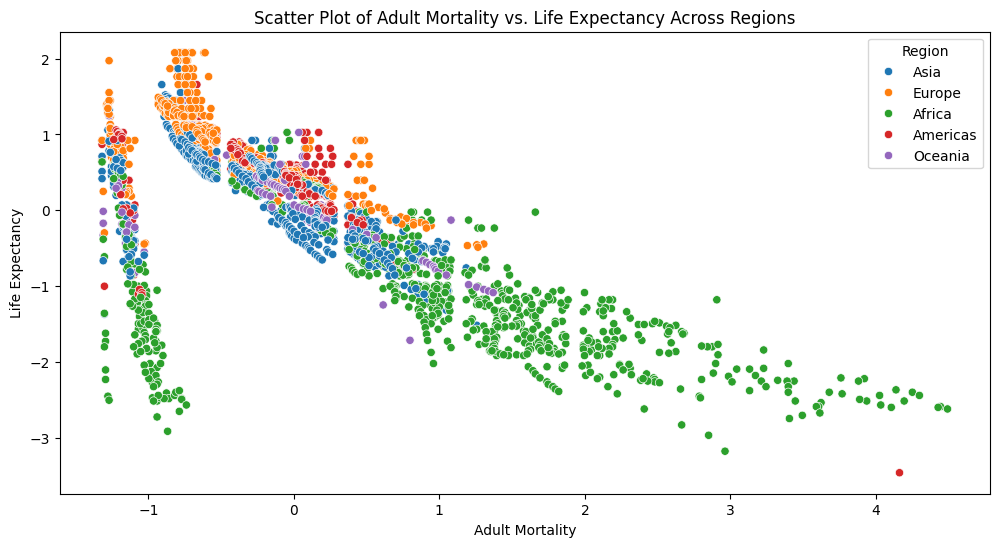

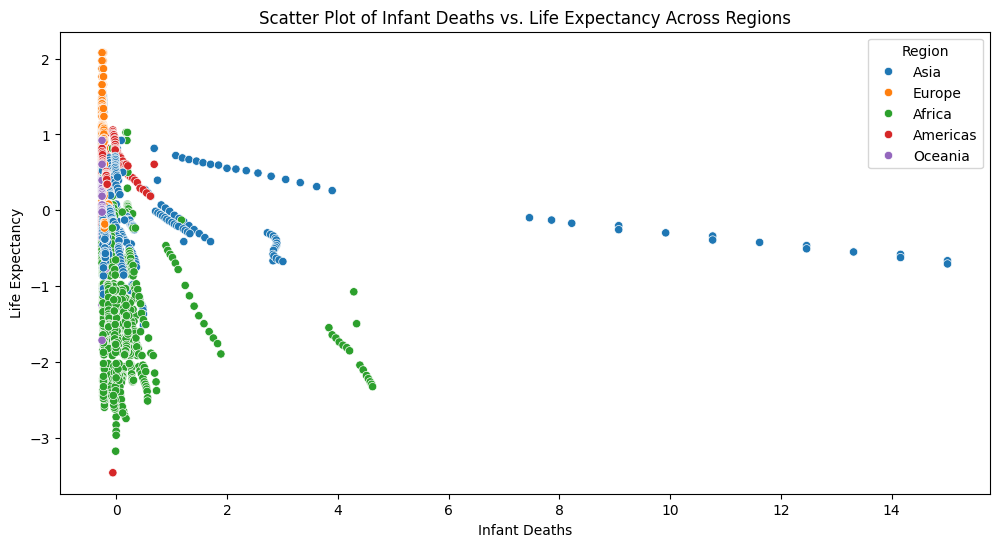

Region with the strongest correlation for Adult Mortality: Asia(-0.67)
Region with the weakest correlation for Adult Mortality: Americas(-0.47)
Region with the strongest correlation for Infant Mortality: Oceania(-0.42)
Region with the weakest correlation for Adult Mortality: Americas(-0.06)


In [10]:
mortality_data = df[["Adult Mortality", "infant deaths", "Life expectancy", "Continent"]]

continents = mortality_data["Continent"].unique()
corrs_adult = {}
corrs_infant = {}

for continent in continents:
    continental_data = mortality_data[mortality_data["Continent"] == continent]
    
    correlation_adult, _ = stats.pearsonr(continental_data["Adult Mortality"], continental_data["Life expectancy"])
    corrs_adult[correlation_adult] = continent
    correlation_infant, _ = stats.pearsonr(continental_data["infant deaths"], continental_data["Life expectancy"])
    corrs_infant[correlation_infant] = continent
    
    print(f"Continent: {continent}")
    print(f"Correlation between Adult Mortality and Life Expectancy: {correlation_adult:0.6f}")
    print(f"Correlation between Infant Deaths and Life Expectancy: {correlation_infant:0.6f}\n")

plt.figure(figsize=(12, 6))
sns.scatterplot(x="Adult Mortality", y="Life expectancy", hue="Continent", data=mortality_data)
plt.title("Scatter Plot of Adult Mortality vs. Life Expectancy Across Continents")
plt.xlabel("Adult Mortality")
plt.ylabel("Life Expectancy")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x="infant deaths", y="Life expectancy", hue="Continent", data=mortality_data)
plt.title("Scatter Plot of Infant Deaths vs. Life Expectancy Across Continents")
plt.xlabel("Infant Deaths")
plt.ylabel("Life Expectancy")
plt.show()

adultStrongest = max(corrs_adult.keys(), key=lambda x: abs(x))
adultWeakest = min(corrs_adult.keys(), key=lambda x: abs(x))
infantStrongest = max(corrs_infant.keys(), key=lambda x: abs(x))
infantWeakest = min(corrs_infant.keys(), key=lambda x: abs(x))
print(f"Region with the strongest correlation for Adult Mortality: {corrs_adult[adultStrongest]}({adultStrongest:0.2f})")
print(f"Region with the weakest correlation for Adult Mortality: {corrs_adult[adultWeakest]}({adultWeakest:0.2f})")
print(f"Region with the strongest correlation for Infant Mortality: {corrs_infant[infantStrongest]}({infantStrongest:0.2f})")
print(f"Region with the weakest correlation for Adult Mortality: {corrs_infant[infantWeakest]}({infantWeakest:0.2f})")

4. What is the relationship between life expectancy and lifestyle factors such as alcohol consumption?

Correlation Matrix for Lifestyle Factors:
                        BMI  Total expenditure       GDP  Life expectancy
BMI                1.000000           0.242117  0.289579         0.574377
Total expenditure  0.242117           1.000000  0.101705         0.207563
GDP                0.289579           0.101705  1.000000         0.448893
Life expectancy    0.574377           0.207563  0.448893         1.000000


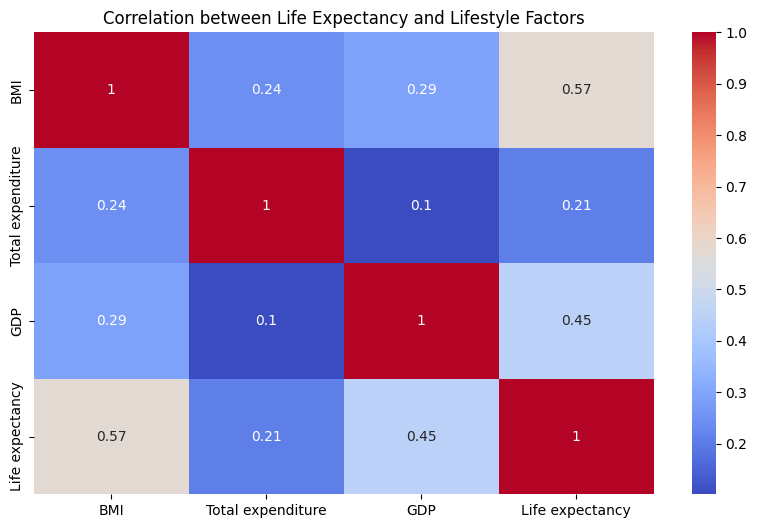

Positive correlation between BMI and life expectancy.
Positive correlation between healthcare expenditure and life expectancy.
Positive correlation between GDP and life expectancy.


In [8]:
lifestyle_data = df[["BMI", "Total expenditure", "GDP", "Life expectancy"]]

lifestyle_correlation = lifestyle_data.corr()
print("Correlation Matrix for Lifestyle Factors:")
print(lifestyle_correlation)


plt.figure(figsize=(10, 6))
sns.heatmap(lifestyle_correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between Life Expectancy and Lifestyle Factors")
plt.show()

if lifestyle_correlation["Life expectancy"]["BMI"] > 0:
    print("Positive correlation between BMI and life expectancy.")
else:
    print("Negative correlation between BMI and life expectancy.")

if lifestyle_correlation["Life expectancy"]["Total expenditure"] > 0:
    print("Positive correlation between healthcare expenditure and life expectancy.")
else:
    print("Negative correlation between total expenditure and life expectancy.")

if lifestyle_correlation["Life expectancy"]["GDP"] > 0:
    print("Positive correlation between GDP and life expectancy.")
else:
    print("Negative correlation between GDP and life expectancy.")


5. How does educational attainment, as measured by years of schooling, affect human lifespan?

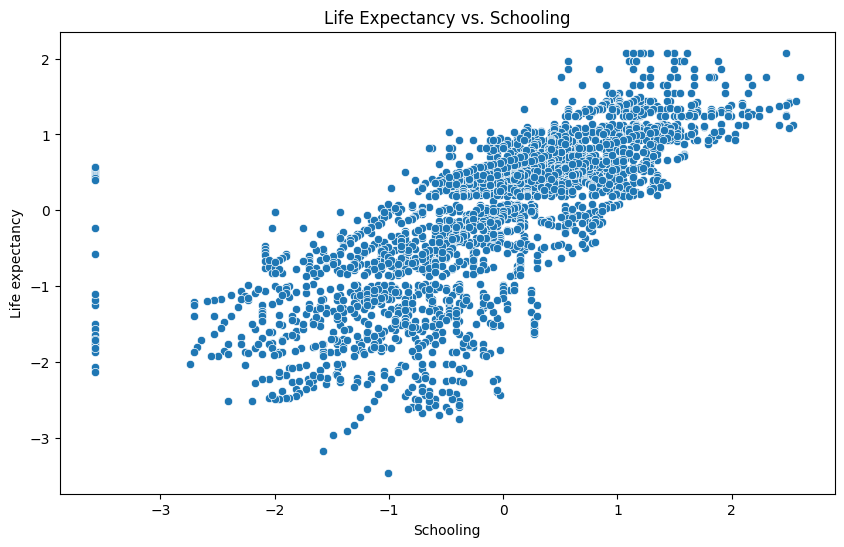

Correlation between Schooling and Life Expectancy: 0.7624845162565115
There is a positive correlation between schooling and life expectancy.


In [9]:
df = df[["Life expectancy", "Schooling"]]

# Scatter plot for Life Expectancy vs. Schooling
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Schooling", y="Life expectancy", data=df)
plt.title("Life Expectancy vs. Schooling")
plt.show()

correlation_schooling, _ = stats.pearsonr(df["Schooling"], df["Life expectancy"])
print(f"Correlation between Schooling and Life Expectancy: {correlation_schooling}")

if correlation_schooling > 0:
    print("There is a positive correlation between schooling and life expectancy.")
elif correlation_schooling < 0:
    print("There is a negative correlation between schooling and life expectancy.")
else:
    print("There is no significant correlation between schooling and life expectancy.")